## Clipping Outliers: NYC hotel pricing dataset analysis

Sometimes, while analyzing a dataset, there can be some data present which might exert undue influence while building models, like linear regression. These data are called outliers. Outliers can sometimes mislead the set of data and influence model performance as well.

`What are outliers?`

In data science, outliers are values within a dataset that vary greatly from the others, they are either much larger, or significantly smaller. Outliers can appear in a dataset due to variability of measurement, error in data, experimental error etc.  Outliers can cause machine learning models to make inaccurate predictions when they are included in the training data, so they need to be handled before training a model.

One of the best ways to understand outliers is box plots. 

Boxplots are very useful to see the distribution of a variable/feature and detect outliers in them.  It is a useful graphical representation for describing the behavior of the data in the middle as well as both ends of the distribution. A box plot shows the data based on the five-number summary:

- **Minimum:** the lowest data point in a variable excluding any outliers
- **Median (Q2 or 50th percentile):** the middle value in the variable
- **First quartile (Q1 or 25th percentile):** also known as the lower quartile (0.25)
- **Third quartile (Q3 or 75th percentile):** also known as the upper quartile (0.75)
- **Maximum:** the highest data point in the variable excluding any outliers



`Interquartile Range:`

The difference between the lower quartile and the upper quartile(Q3 - Q1) is called the **interquartile range** or **IQR**. 

Boxplots help us find the outliers in the data by using the IQR. As a rule, values that are outside the range of 1.5*IQR from Q1 and Q3 are regarded as outliers. The below image will help us better understand the outliers in our data.  

<img src="../Boxplot.png"
     alt="boxplot icon"
     width="500" 
     height="300"
     style="margin-right: 10px;" />

In the image above, the points that are outside the whisker lines are the outliers.

There are different techniques to handle outliers in a dataset. In our example, we will use the concept of clipping (winsorizing).

`What is winsorizing/clipping?`

Clipping data from a dataset means to clip the data at the last permitted extreme value, e.g. the 5th or 95th percentile value. For example, when we clip the data to 95th percentile, values over the 95th percentile will be set to the 95th percentile value meaning all the values greater than 95% percent will equal to the 95th percentile value. 

The following data set has several (bolded) extremes:
- {**0.1, 1,** 12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **99, 125**}

After clipping/winsorizing the top and bottom 10% of the data(matching those values to the nearest extreme), we get:
- {**12, 12,**12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **44, 44**}

Let us solve a problem that removes outliers from data using clipping.


## Problem Description

For illustration of the clipping method, lets look at an example. 

We have a dataset named **nyc_airbnb.csv** , which contains data about price of AirBnb per-night rental houses. In the dataset, there exists some outliers in the `price` variable. Our task is to find out the outliers and remove them by winsorizing/clipping. 


First , we load our dataset into a dataframe and view it.

## Load the Dataset and View data

The steps are:
    
- import the `pandas` library as `pd`
- load the data into a variable `nyc` using `read_csv` method in pandas 
- view the variable `nyc`.   

In [1]:
import pandas as pd
nyc= pd.read_csv("../datasets/nyc_airbnb.csv")

In [2]:
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Check for outliers in `price` data

Since we are looking to find out the outliers in the hotel price , an effective way of finding outliers is using visualizations. To see where the outliers lie in `price` data, strip plot is a very useful graph to see how the datapoints are spread.




### Plot a strip plot for outlier estimation:

For our strip plot, we visualize every datapoint of the `price` data. We look at the spread of `price` data in the y axis. For this plot, we import the `plotly express` library.



The steps are:
- import the `plotly.express` library as `px`
- using `px`, call the `strip()` method to generate the strip plot
- inside the method, the parameters will be,
    - `nyc`: variable where the data is stored
    - `price`: column data to plot in the y axis
- store the result into a variable `price_strip` that will save the plot in this variable
- display the variable `price_strip` using the `show()` method 

In [24]:
import plotly.express as px

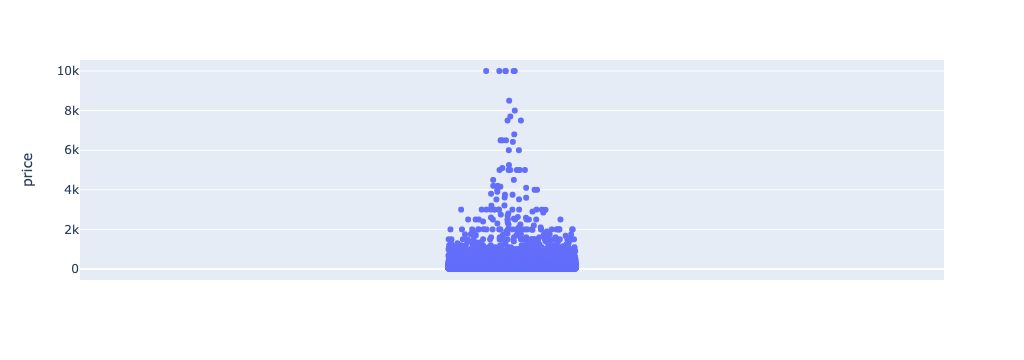

In [27]:
price_strip = px.strip(nyc, y='price')

price_strip.show()




From the strip plot, we can see that the data range is between 0-10,000. The majority of the datapoints are within the range of 0-2000 and a few of them are over 4000. We can see that there definitely exists some outliers in the `price` data. The points beyond them (> 4000) can be considered as outliers for `price` data. But we need to know the exact outlier points to apply clipping to the data. 


Let us plot a boxplot on the `price` data and compare it to the boxplot explained above. 


The steps are:

- call the `boxplot()` method to generate the boxplot
- inside the method, the parameters will be,
    - `column`: the column data to plot for the boxplot 
    - `figsize`(optional): to define the size of the figure in terms of width and height
    - `fontsize`(optional): to show the texts size in the figure
    - `vert`(optional): the allignment(x or y axis) of the plot. Value `False` means horizontal(x axis) alignment, `True` vertical alignment 
- apply the `boxplot()` method to the variable `nyc`, where our data is stored    
- store the result in a variable `box_price`    
- use the `box_price` variable to display the boxplot    


<AxesSubplot:>

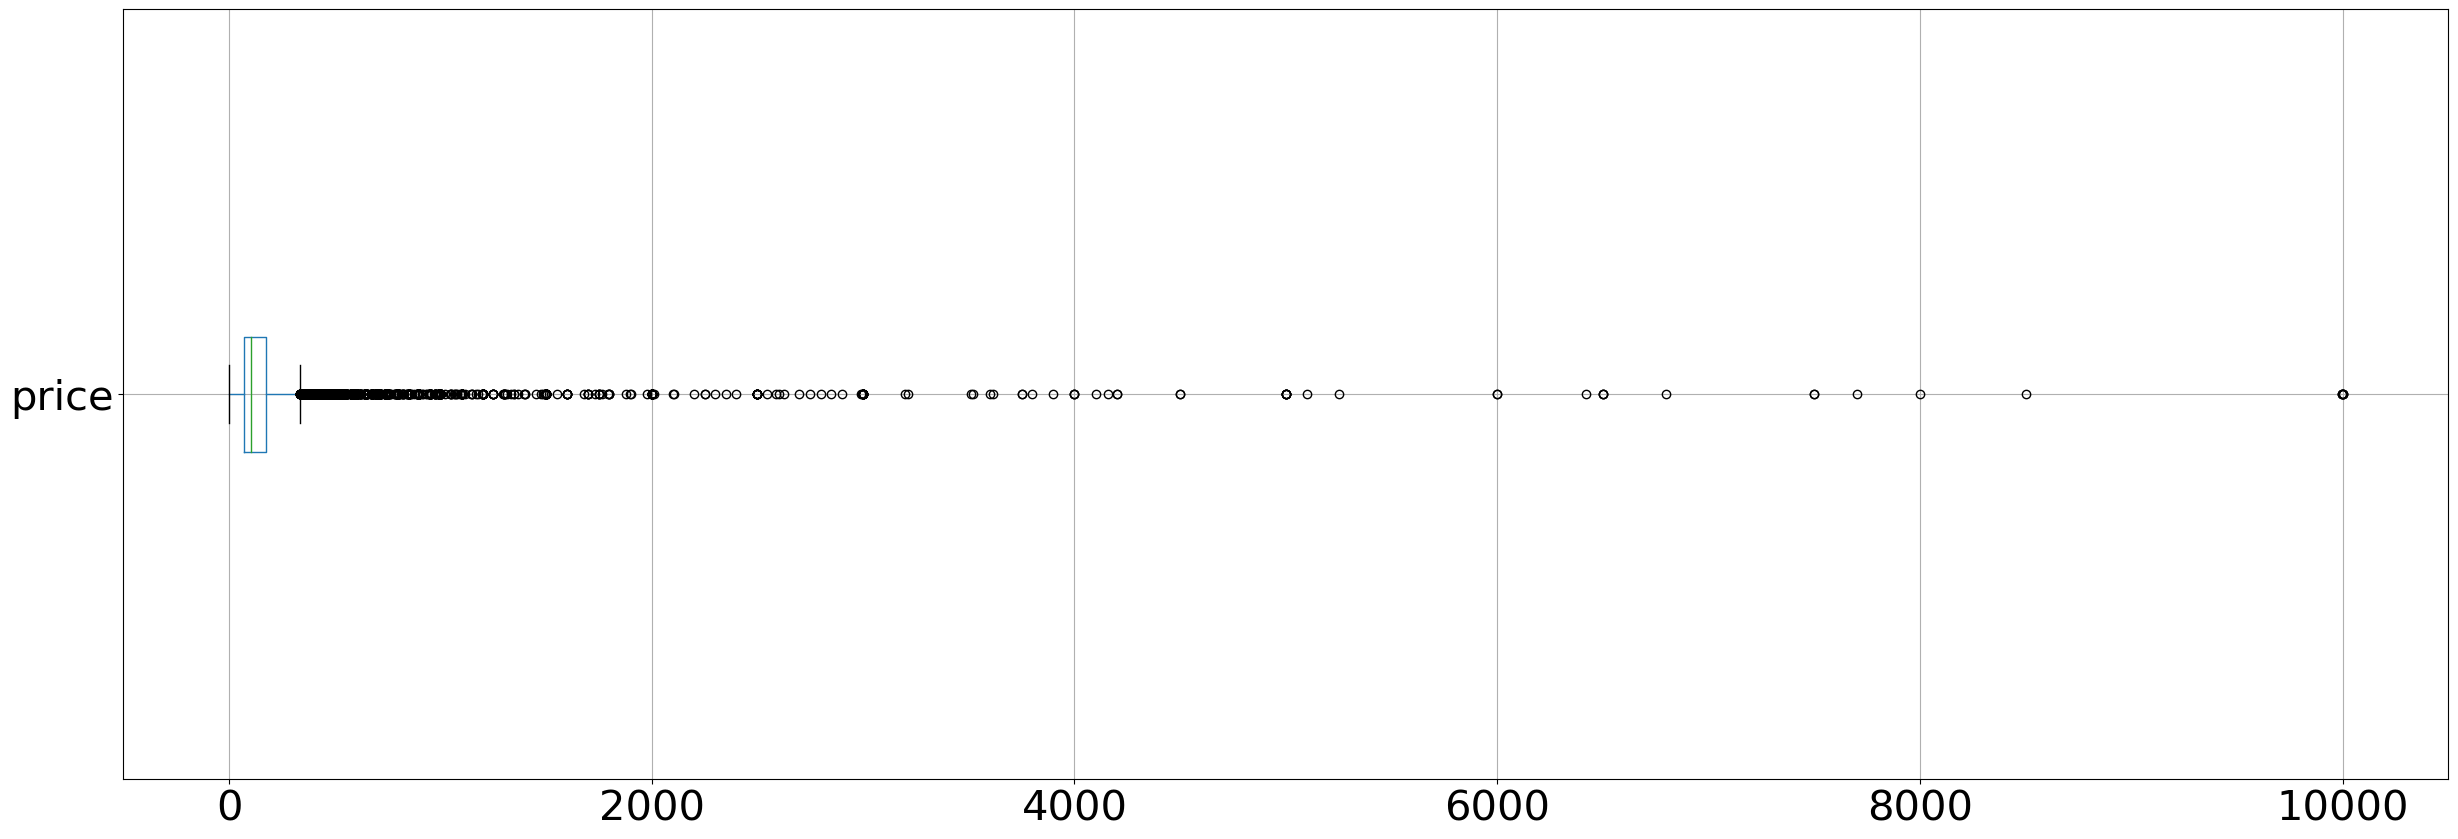

In [21]:
box_price = nyc.boxplot(column='price',figsize=(30,10), fontsize='30', vert=False)

box_price

From the boxplot, we can see that most of the datapoints are outside the whisker lines (on the right side, these are actually the outliers). The valid range of values (that are not outliers) would be within the whisker points (range of Q1-1.5*IQR and Q3 + 1.5*IQR). The datapoints outside this range are the outlier points.

Our task now is to find these limit points to remove the outliers.

## Use `describe()` for `price` distribution in terms of numbers:

To find the exact non-outlier points range in `price`, we need to see the number distribution of `price` in the quartile division. This will give us a better understanding of where the outliers lie. We will use the describe method to know about the distribution of `price` data. 



The steps are:

- select the `price` column from the variable `nyc`
- use the `describe()` method on the price data. This will show the `price` data distribution on the five number summary  

In [46]:
nyc['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Here, if we look on the `price` distribution, we can see the min, 25%, 50%, 75% and max price value of `price`. The price values ranges from 0 to 10000 and the 75% percentile value of price is 175. This means 75% price value is within 0 -175. So, lots of datapoints are in the 75-100% range . Our outliers lie mostly in this region of values.   


## Find the Outliers:

Using the `quantile` formula, we find out our interquartile(IQR) range alongside lower and upper limits for outlier points. For that , we find out the `q3` and `q1` points in the `price` data. 

### Calculate Q3:


The q3 point is the data point that represents the 75th percentile value in the `price` data.

The steps are:
 - select the `price` column from the variable `nyc`
 - use the `quantile()` method on the price data
 - inside the quantile method, the parameter will be,
     - the percentile value whose datapoint we want to find(75% for q3)
 - store the result in a variable `q3`  
 - print the variable `q3`

In [47]:
q3= nyc['price'].quantile(0.75)

print("q3:",q3)

q3: 175.0


### Calculate Q1:


Similar to `q3`,the `q1` data point represents the 25th percentile value of `price` data.  

The steps are:
 - select the `price` column from the variable `nyc`
 - use the `quantile()` method on the price data
 - inside the quantile method, the parameter will be,
     - the percentile value whose datapoint we want to find(25% for q1)
 - store the result in a variable `q1`  
 - print the variable `q1`

In [48]:
q1= nyc['price'].quantile(0.25)

print("q1:",q1)

q1: 69.0


### Find the interquartile range (IQR):



After calculating `q1` and `q3`, we find out the interquartile range which is the difference between these two points. This range will determine the outlier points(upper and lower bound) for our `price` data.


The steps are:
- substract `q3` from `q1`
- store the result in a variable `iqr`
- print the variable `iqr`

In [49]:
iqr= q3 - q1

print("iqr:",iqr)

iqr: 106.0


### Calculate the upper and lower bound for outliers:

After finding the interquartile range(iqr), the next task is to calculate the upper and lower bound points to find out the outlier range in the data. We use the `iqr` and the calculated q1,q3 data points to find out the lower and upper bound points.

For the lower bound, the point will be 1.5\*iqr from q1 which means (q1 - 1.5\*iqr)

For the upper bound, the point will be 1.5\*iqr from q3 which means (q3 + 1.5\*iqr)


The steps are:

for `upper bound`,
- define the range q3 + 1.5*iqr
- store it in a variable `upper_bound`
- print the `upper_bound`

for `lower bound`,
- define the range q1 - 1.5*iqr
- store it in a variable `lower_bound`
- print the `lower_bound`

In [50]:
upper_bound= q3 + 1.5*iqr

print("upper bound",upper_bound)

lower_bound= q1 - 1.5*iqr

print("lower bound",lower_bound)

upper bound 334.0
lower bound -90.0


## Clip the Outliers:

### Find the Clipping points:

Now that we have found the outlier points, we need to clip the `price` data according to those points. The clipping points for the upper and lower bound will be as follows:

- lower_point= max(lower_bound, nyc['price'].min())
- upper_point= min(upper_bound, nyc['price'].max())

For lower point of outliers, we are actually taking the max value between the minimum price value (0) and the `lower_bound` because we can go as far as the minimum data point that we have. In this example, we found that our `lower_bound` is -90. But our lowest data point is 0. So we dont need the lower bound as -90. We need to go only as far as the lowest data point that is 0.

The same stands for the upper bound data. We need to go only as far as the highest datapoint. The maximum datapoint we have is 10,000 and our lower bound is 334. So we will take the minimum from these two points.

That is why we are using this min() for upper point and max() for lower bound calculation.




The steps are:

for `lower_point`,

- use the max() function
- the function parameters will be,
    - `lower_bound`: calculated in the previous step
    - `nyc['price'].min()` : the minimum value in the `nyc['price']` data
- store that function into variable `lower_point`
- print the variable `lower_point`

for `upper_point`,

- use the min() function
- the function parameters will be,
    - `upper_bound`: calculated in the previous step
    - `nyc['price'].max()` : the maximum value in the `nyc['price']` data 
- store that function into variable `upper_point`
- print the variable `upper_point`    

In [51]:
lower_point= max(lower_bound, nyc['price'].min())

print("lower_point", lower_point)

upper_point= min(upper_bound, nyc['price'].max())

print("upper_point", upper_point)

lower_point 0
upper_point 334.0


### Clip outliers using the clipping points:

Now that we have found our lower and upper point, we clip our data according to them.After clipping, as shown in our introductory example, the points less than the lower_point will be set to the `lower_point` and the points greater than the upper point will be set to the `upper_point`. By doing this , it will remove the outlier points from the `price` data. This method of removing outliers from data is called `winsorizing`. 

The steps are:
- select the `price` column from `nyc` dataframe
- call the `clip()` method on the `price` column
- in the method, set the parameters as,
    - `lower_point`: the lower point of price data
    - `upper_point`: the upper point of price data
- set the result to the `price` column of `nyc` dataframe to make the changes permanent 

In [52]:
nyc['price'] = nyc['price'].clip(lower_point, upper_point)

## Check final clipped data:

After clipping, We check the five number summary of `price` data using the `describe` method.

The steps are:
- select the `price` column from the variable `nyc`
- use the `describe()` method on the `price` data 

In [53]:
nyc['price'].describe()

count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64

After clipping the `price` data, we can see the distribution has become more dense (0-334) which was in the range(0-10000) before. Building a model from the new `price` distribution now will give us a better estimation of hotel prices since all the outlier values are removed from it.

## Distribution after clipping data  

Let us see how our strip plot looks now compared to the intial one we plotted and see the difference.

The steps are:

- using `px`, call the `strip()` method to generate the strip plot
- inside the method, the parameters will be,
    - `nyc`: variable where the data is stored
    - `price`: column data to plot in the y axis
- store the result into a variable `price_strip2` that will save the plot in this variable
- display the variable `price_strip2` using the `show()` method 

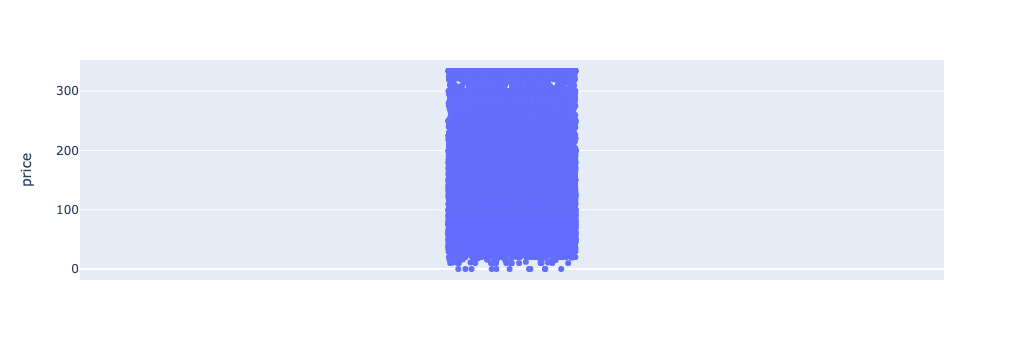

In [54]:
price_strip2= px.strip(nyc, y='price')

price_strip2.show()

Now lets visualize the boxplot to check if outliers exist in the `price` data.

The steps are:

- call the `boxplot()` method to generate the boxplot
- inside the method, the parameters will be,
    - `column`: the column data to plot for the boxplot 
    - `figsize`(optional): to define the size of the figure in terms of rows and columns
    - `fontsize`(optional): to show the texts size in the figure
    - `vert`(optional): the allignment(x or y axis) of the plot. Value `False` means horizontal(x axis) alignment, `True` vertical alignment 
- apply the `boxplot()` method to the variable `nyc`, where our data is stored    
- store the result in a variable `box_price2`    
- use the `box_price2` variable to display the boxplot    


<AxesSubplot:>

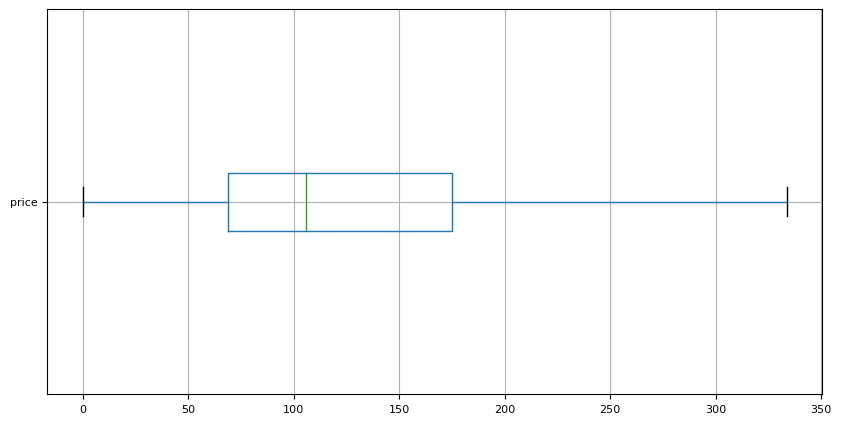

In [55]:
box_price2= nyc.boxplot(column='price', figsize=(10,5), fontsize='8', vert=False)
box_price2

From the image above, we can see that there are no outlier points (dotted points) beyond the whisker marks which indicates that the outliers points have been removed by clipping/winsorizing.

## Conclusion

By using the clip method, we have removed our outliers from the price data. Now using this dataset will give us good predictions of airbnb hotel prices in New York. 